reference https://3dbabove.com/2017/11/14/optimizationalgorithms/

## Stochastic Gradient Descent (SGD)

In [1]:
import numpy as np

In [2]:
# J = cos(3*pi*theta) / theta
def minimaFunction(theta):
    # theta != 0
    return np.cos(3*np.pi * theta) / theta

def minimaFunctionDerivative(theta):
    const1 = 3*np.pi
    const2 = const1 * theta
    return -const1 * np.sin(const2)/theta - np.cos(const2)/(theta ** 2)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

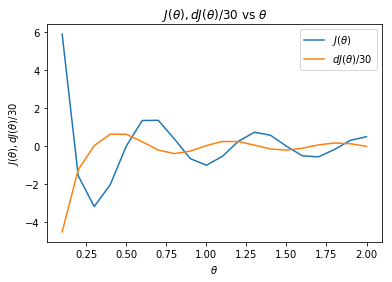

In [4]:
theta = np.arange(.1, 2.1, 0.1)
Jtheta = minimaFunction(theta)
dJtheta = minimaFunctionDerivative(theta)

plt.plot(theta, Jtheta, label= r'$J(\theta)$')
plt.plot(theta, dJtheta/30, label=r'$dJ(\theta)/30$')
plt.legend()
axes = plt.gca()

plt.ylabel(r'$J(\theta), dJ(\theta)/30$')
plt.xlabel(r'$\theta$')
plt.title(r'$J(\theta), dJ(\theta)/30 $ vs $\theta$')
plt.show()

- This cost function has a few minima: around .25, 1.0, and 1.7
- The derivative is equal to 0 at the minima and large at the inflection points

### Implement SGD

In [5]:
import matplotlib.animation as animation

In [6]:
def optimize(iterations, oF, dOF, params, learning_ratel):
    """
    Arguments:
        iterations: number of iterations required to run
        oF: the objective function
        dOF: the derivative function of the objective function
        params: the parameters of the function to minimize
    return:
        oParams: list of optimized paramters at each step of iteration
    """
    
    oParams = [params]
    for i in range(iterations):
        # Compute the derivative of the parameters
        dParams = dOF(params)
        params = params - learning_rate * dParams
        
        oParams.append(params)
        
    return np.array(oParams)

In [7]:
theta = .6
iterations = 45
learning_rate = 0.0007
optimizedParameters = optimize(iterations, minimaFunction, minimaFunctionDerivative, theta, learning_rate)

In [12]:
print(optimizedParameters.shape)

(46,)


### Animation of SGD

In [13]:
from matplotlib import animation, rc
from IPython.display import HTML

In [14]:
# need download ffmpeg to enable animation. Set the proper path of ffmpeg
plt.rcParams['animation.ffmpeg_path'] = 'E:\\tools\\ffmpeg-3.4.1-win64-static\\bin\\ffmpeg.exe'

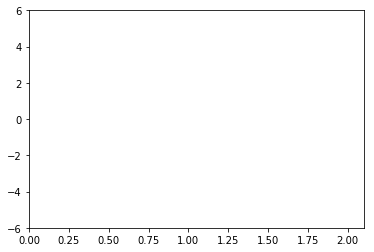

In [15]:
# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot

fig, ax = plt.subplots()

ax.set_xlim((0, 2.1))
ax.set_ylim((-6, 6))

line, =ax.plot([], [], lw=2)
optimizedPoints, = ax.plot([], [], 'bo')

In [16]:
def initForSingleParamSGD():
    theta = np.arange(.1, 2.1, 0.1)
    Jtheta = minimaFunction(theta)
    line.set_data(theta, Jtheta)
    return (line, )

In [19]:
optimizedJValues = minimaFunction(optimizedParameters)
print(optimizedJValues.shape)

(46,)


In [26]:
# animation function. this is called sequentially
def animateForSingleParamSGD(i):
    optimizedPoints.set_data(optimizedParameters[:i], optimizedJValues[:i])
    fig.suptitle('Iteration (%d), theta=%f,J(theta)=%f' % (i, optimizedParameters[i], optimizedJValues[i]))
    return (optimizedPoints, )

In [27]:
# blit=True means only re-draw the parts that have changed
anim = animation.FuncAnimation(fig, animateForSingleParamSGD, init_func = initForSingleParamSGD, 
                              frames = iterations, interval = 120, blit=True)

In [30]:
HTML(anim.to_html5_video())

### SGD with large learning rate

In [44]:
theta = .6
iterations = 45
learning_rate = 0.01 # set the learning rate to 0.015, it will find the second minima point
optimizedParameters = optimize(iterations, minimaFunction, minimaFunctionDerivative, theta, learning_rate)
optimizedJValues = minimaFunction(optimizedParameters)

In [45]:
# blit=True means only re-draw the parts that have changed
anim_largeLearningRate = animation.FuncAnimation(fig, animateForSingleParamSGD, init_func = initForSingleParamSGD, 
                              frames = iterations, interval = 120, blit=True)

In [46]:
HTML(anim_largeLearningRate.to_html5_video())